In [99]:
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:

edu_cost = pd.read_csv("Jupyter projects/International education cost/student dataset/educost.csv")
edu_cost.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [3]:
edu_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [4]:
edu_cost.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


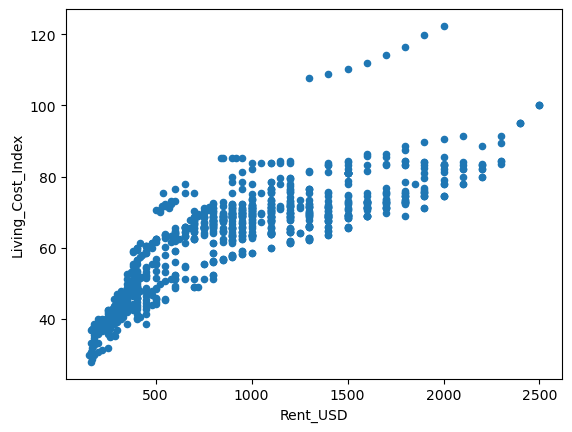

In [5]:
edu_cost.plot(kind = 'scatter', x = 'Rent_USD', y = 'Living_Cost_Index')

plt.show()

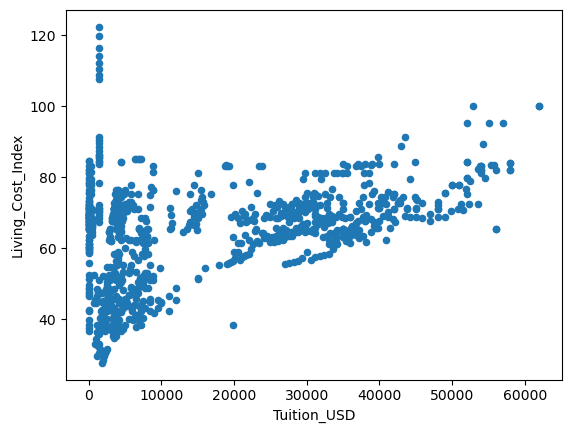

In [6]:
edu_cost.plot(kind = 'scatter', x = 'Tuition_USD', y = 'Living_Cost_Index')

plt.show()

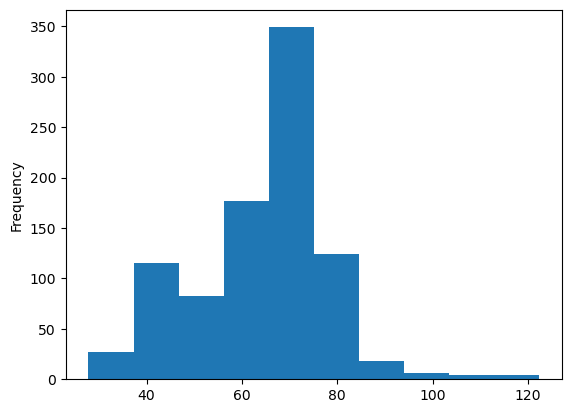

In [7]:
edu_cost['Living_Cost_Index'].plot(kind = 'hist')
plt.show()

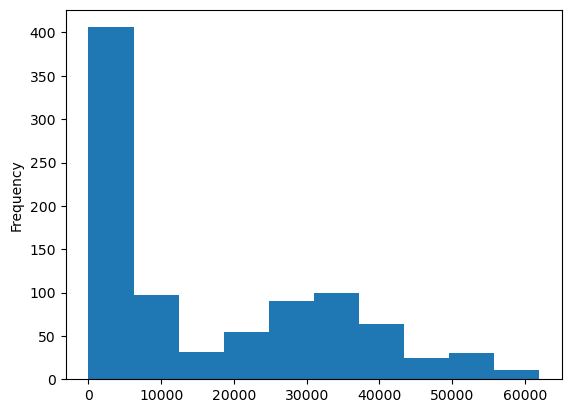

In [8]:
edu_cost['Tuition_USD'].plot(kind = 'hist')
plt.show()

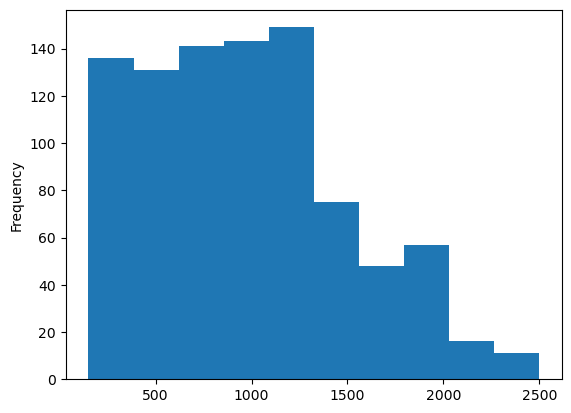

In [9]:
edu_cost['Rent_USD'].plot(kind = 'hist')
plt.show()

In [10]:
#box_prep = edu_cost.groupby('Country')[['City']]
#box_prep


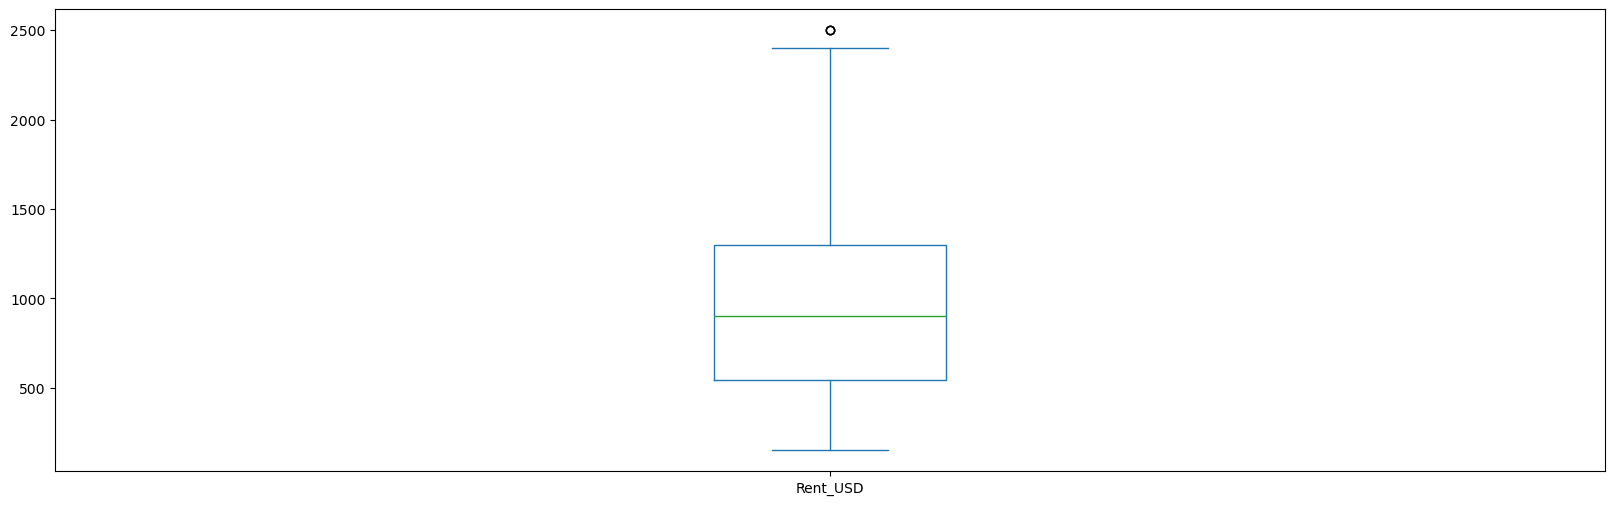

In [11]:
edu_cost['Rent_USD'].plot(kind = 'box', figsize = (20, 6))
plt.show()

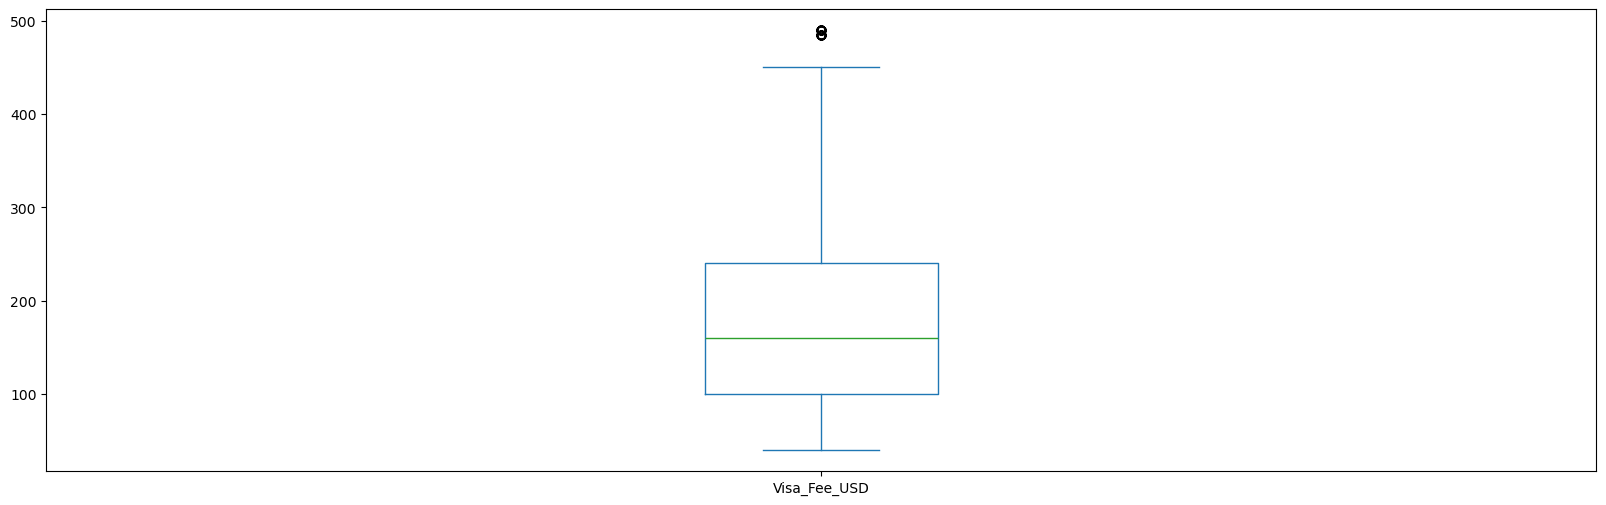

In [12]:
edu_cost['Visa_Fee_USD'].plot(kind = 'box', figsize = (20, 6))
plt.show()

**Both visa fee and rent need to be normalized**

In [13]:
cols= ['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
        'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 
        'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']

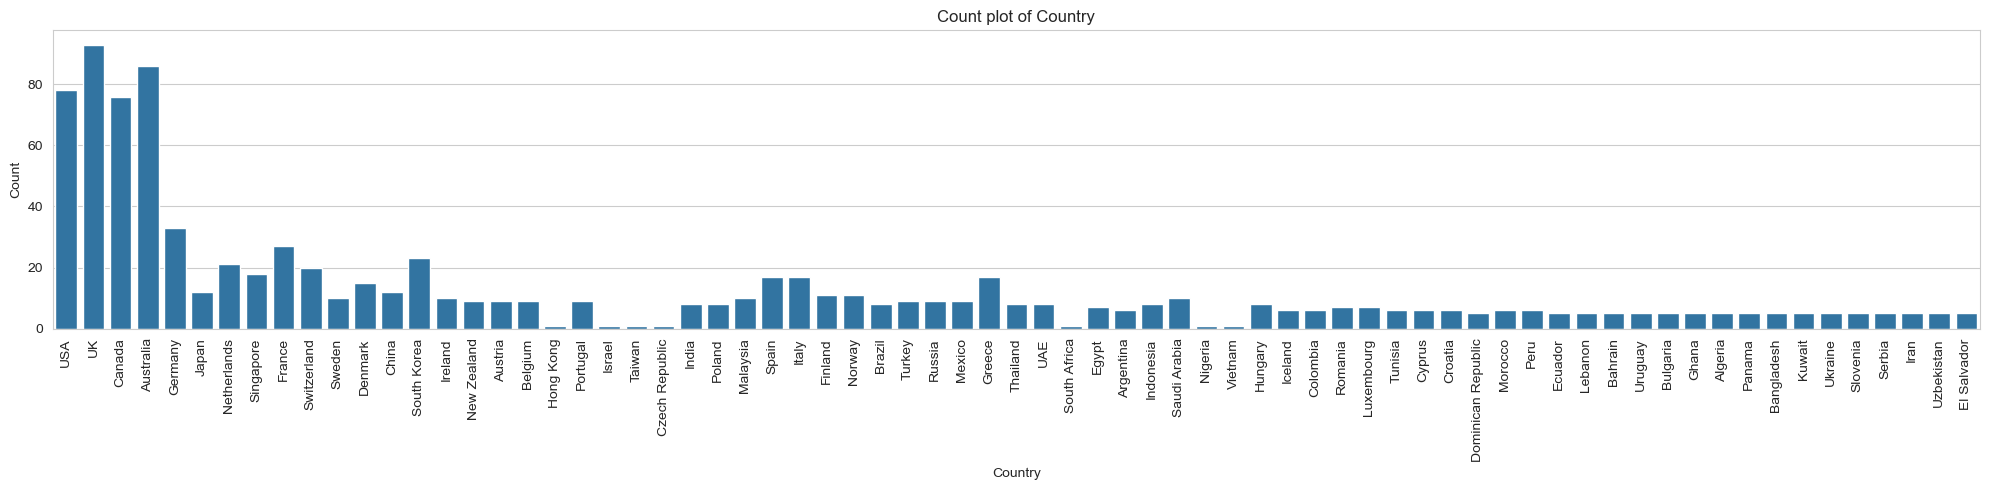

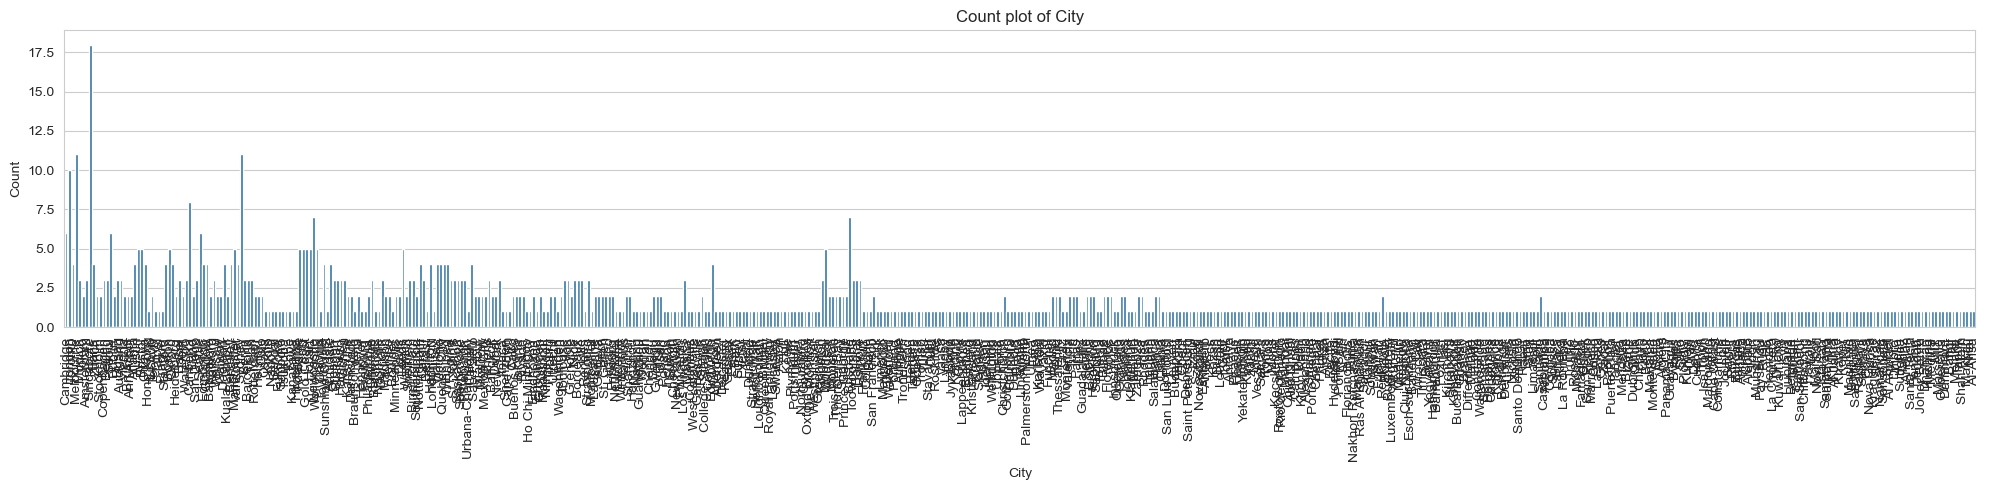

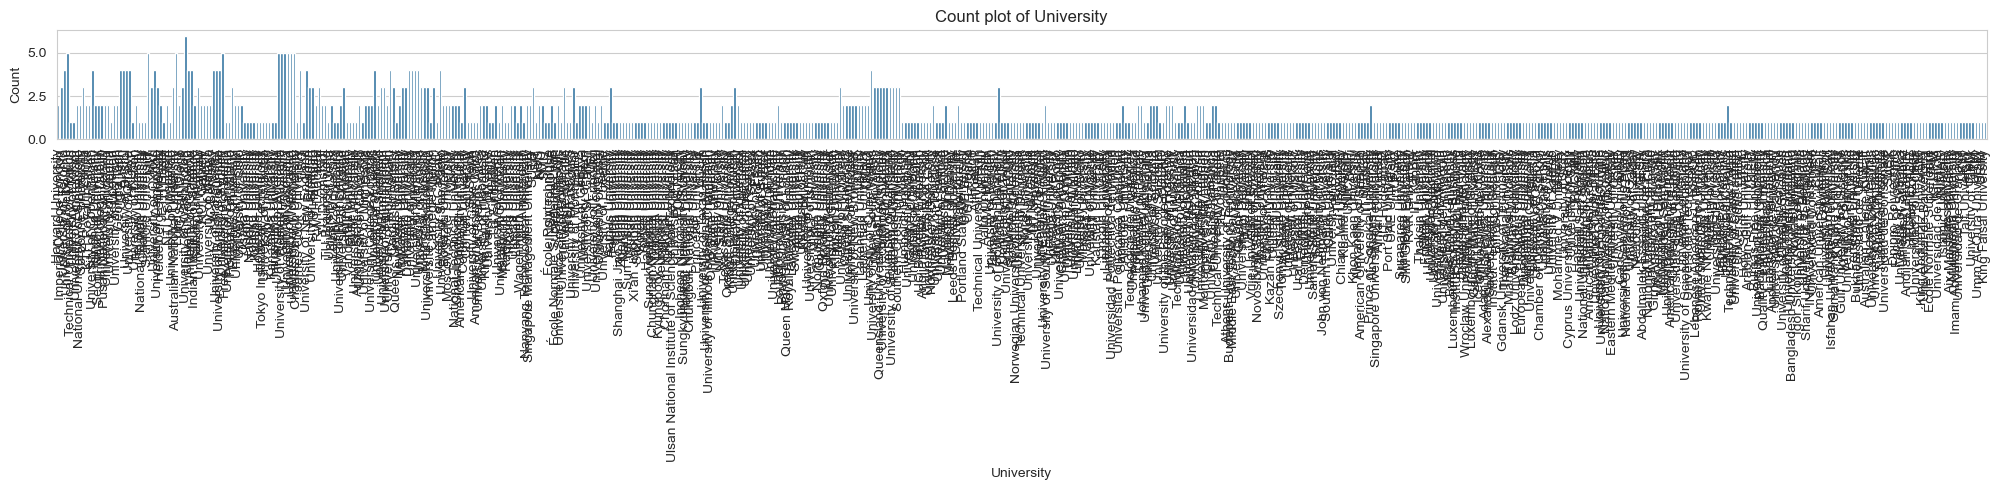

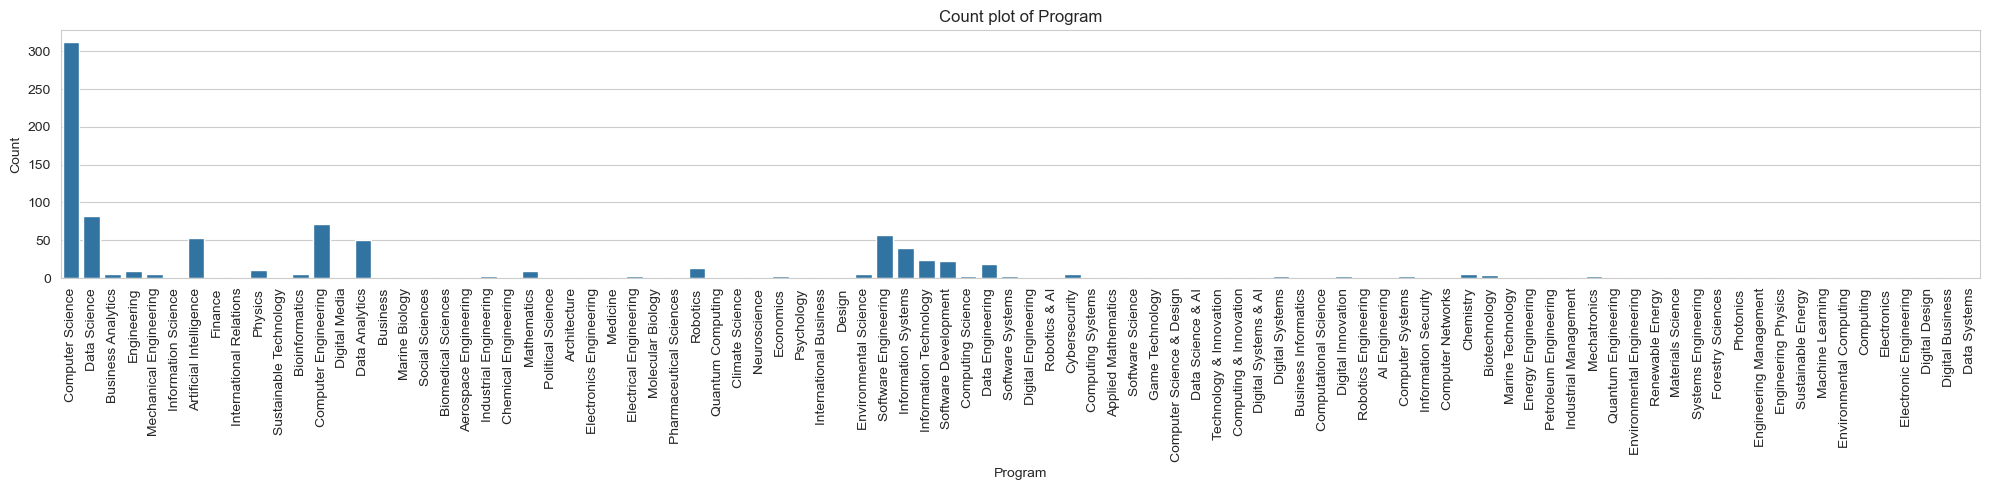

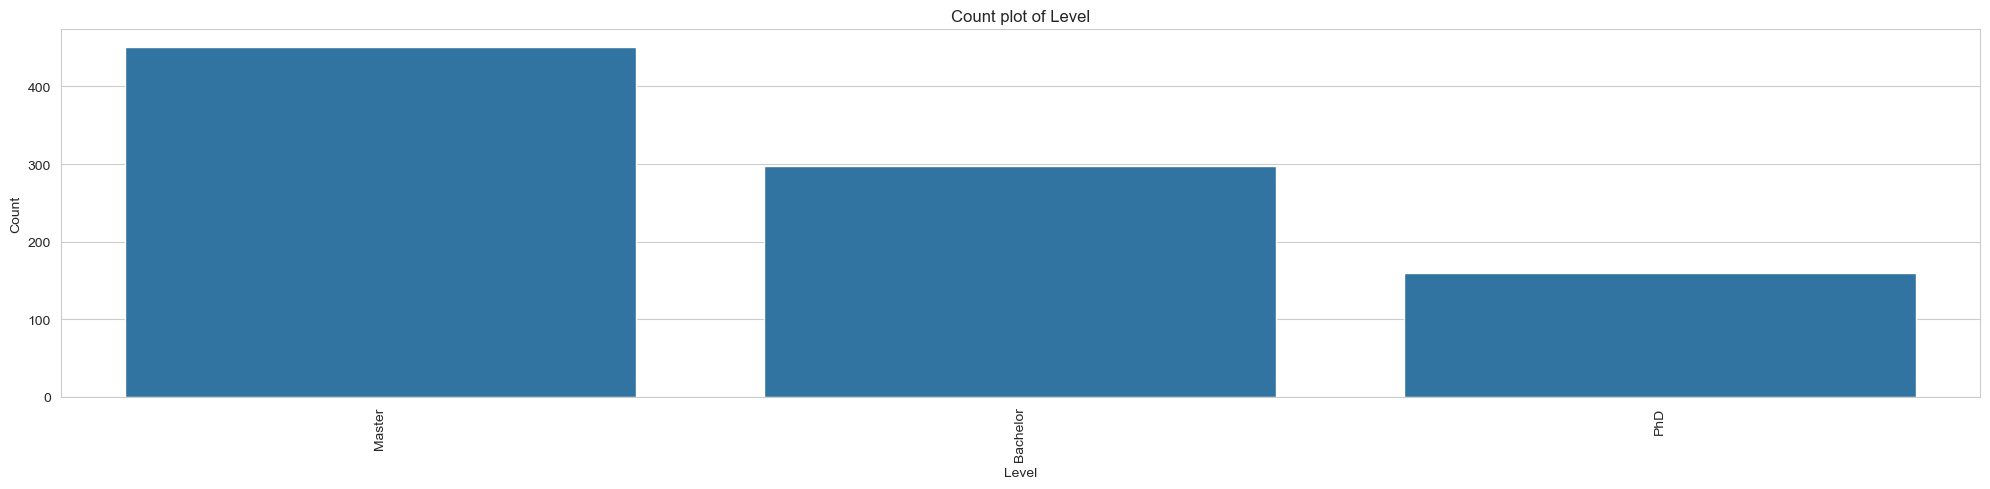

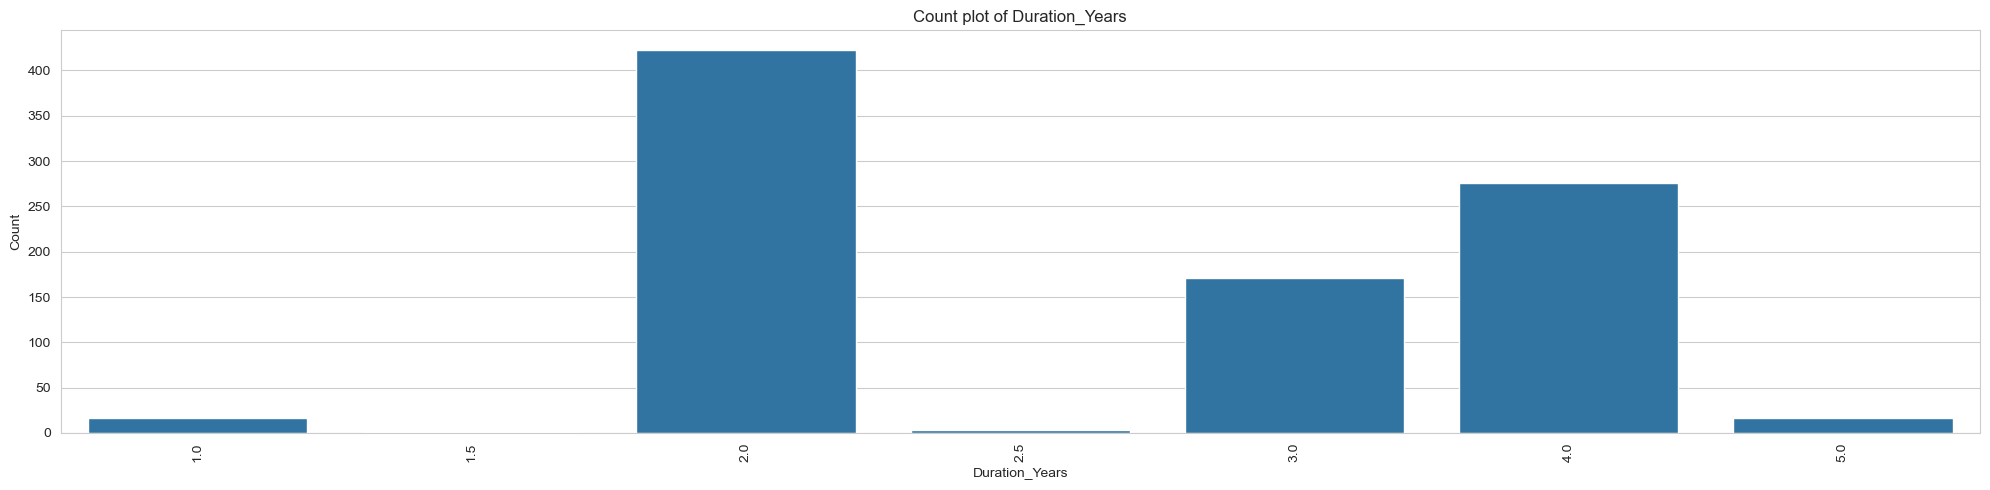

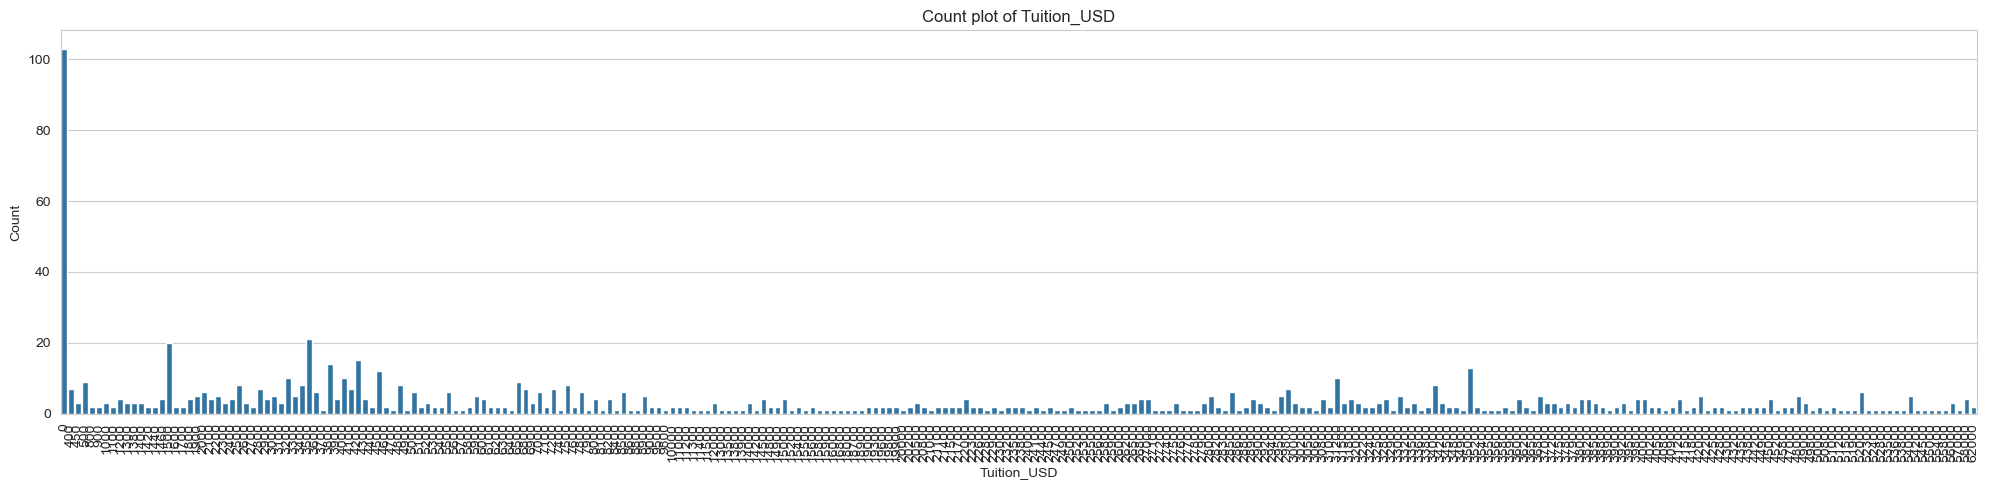

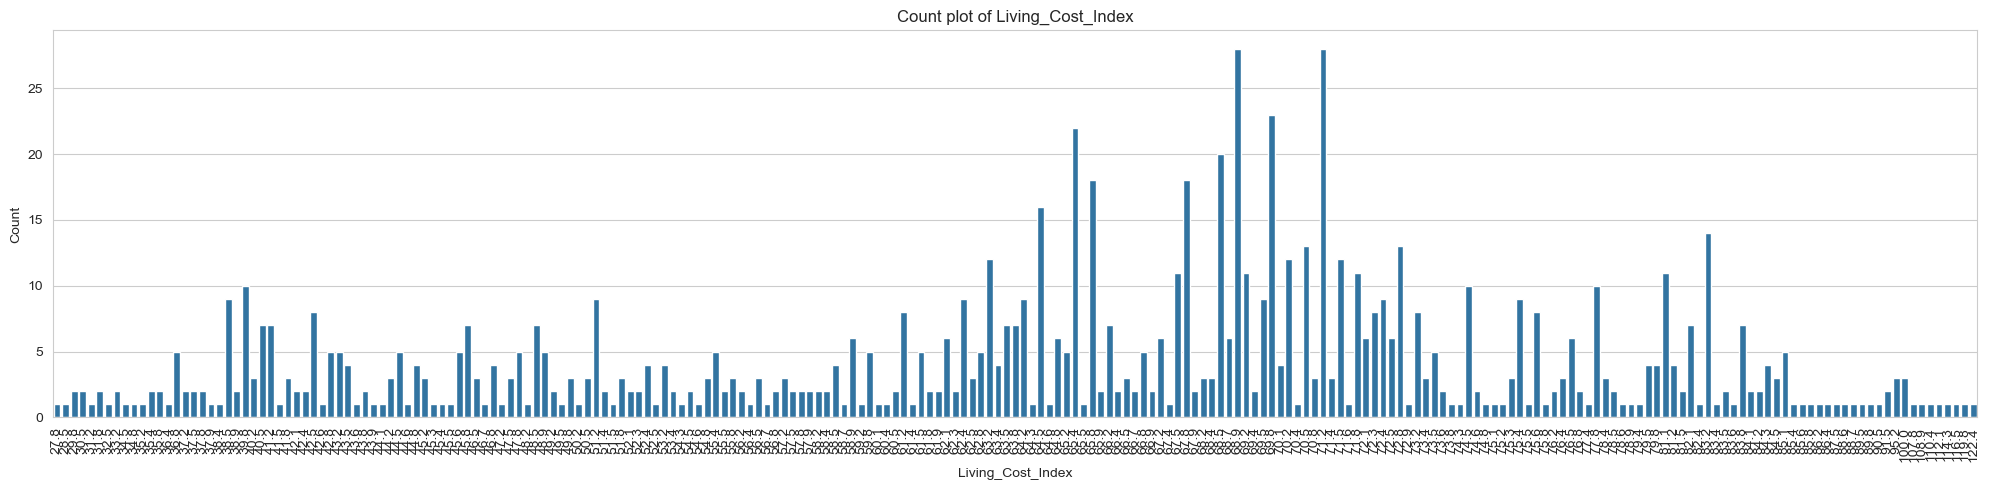

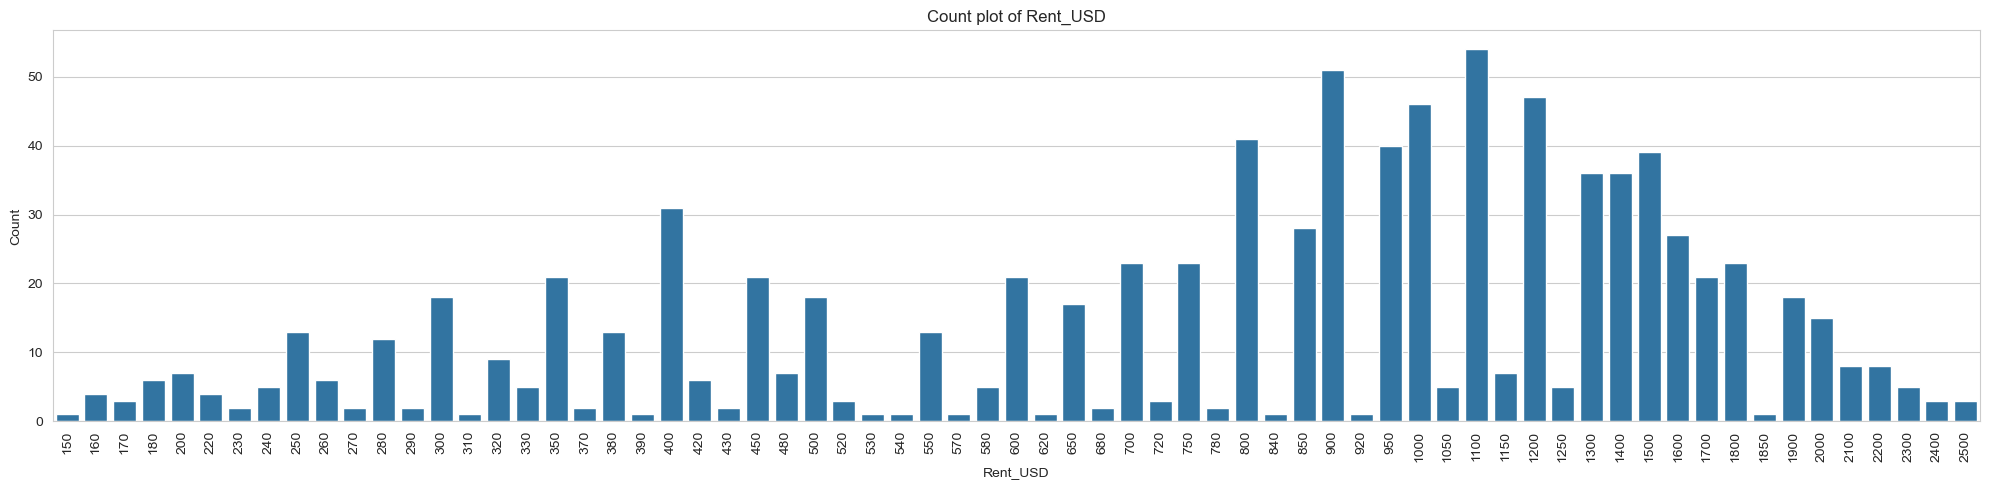

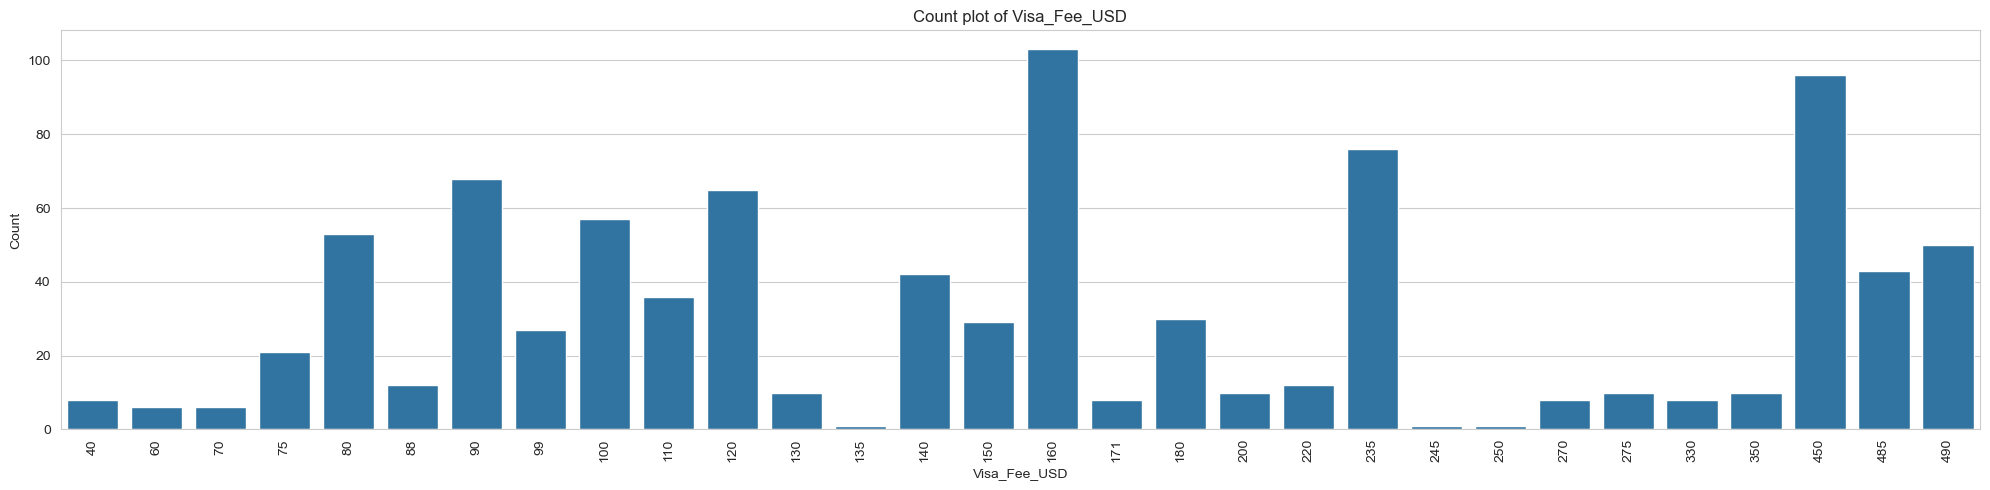

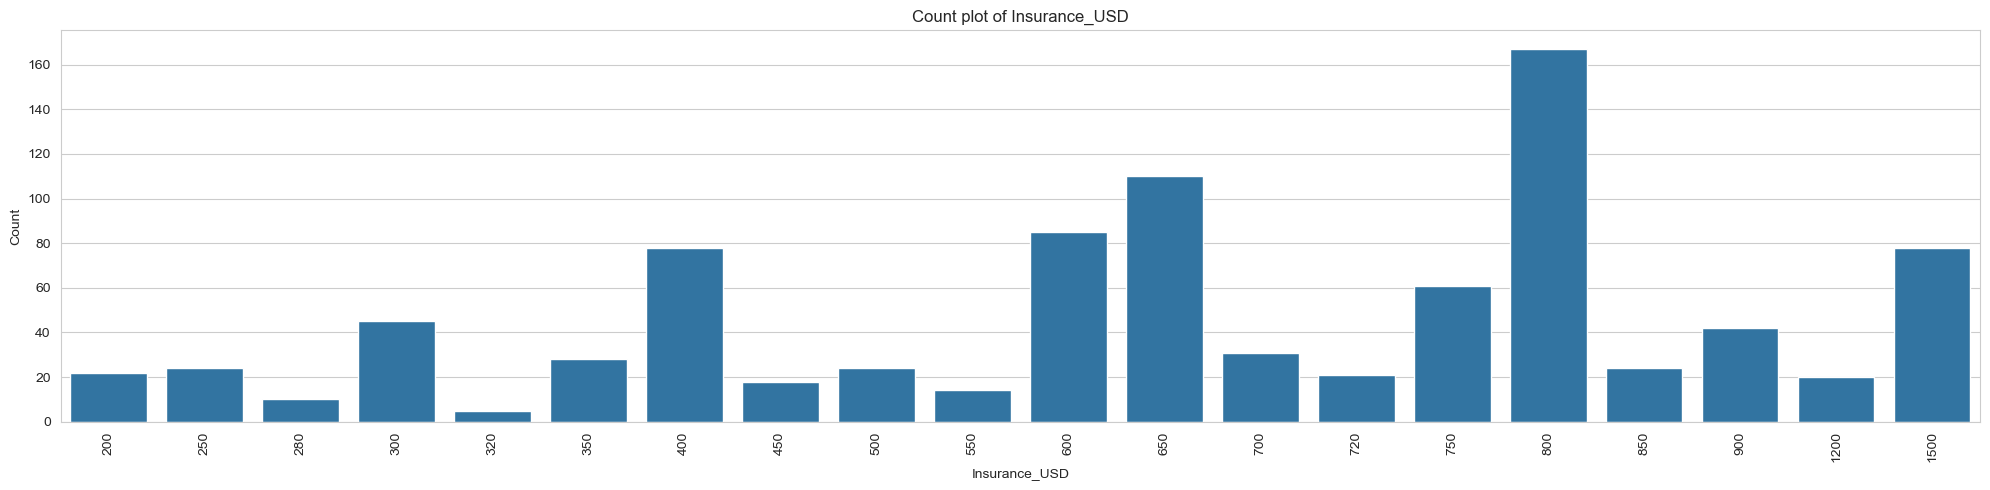

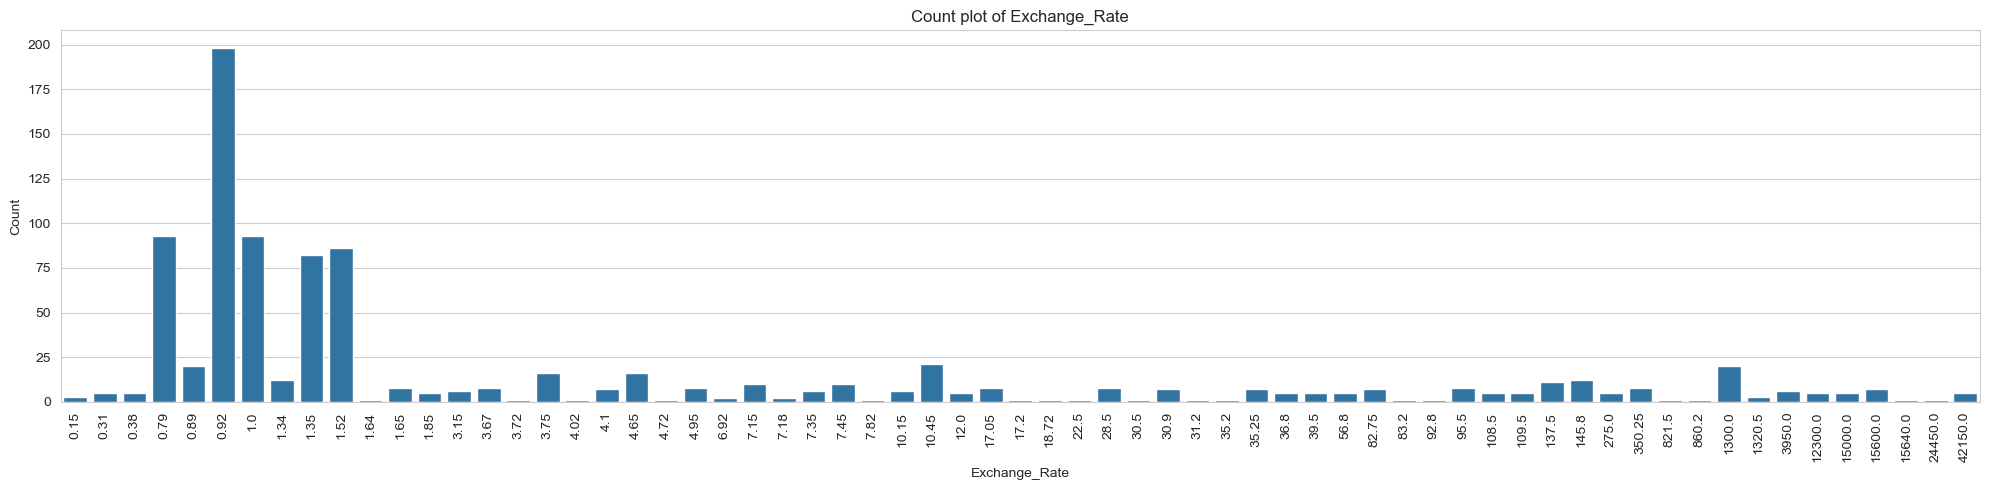

In [14]:
sns.set_style('whitegrid')

for features in cols:
    if features in edu_cost.columns:
        plt.figure(figsize=(20,5))
        sns.countplot(x=features,data=edu_cost)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [15]:
group_scale = ['Tuition_USD', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate']

In [16]:
edu_cost[group_scale]= MinMaxScaler().fit_transform(edu_cost[group_scale])

In [17]:
scaled = pd.DataFrame(edu_cost[group_scale], columns = group_scale)
scaled

,Tuition_USD,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,0.893548,0.872340,0.266667,1.000000,0.000020
1,0.664516,0.702128,0.988889,0.461538,0.000015
2,0.620968,0.617021,0.433333,0.538462,0.000028
3,0.677419,0.531915,0.911111,0.346154,0.000033
4,0.008065,0.404255,0.077778,0.269231,0.000018
...,...,...,...,...,...
902,0.064516,0.361702,0.131111,0.500000,0.000018
903,0.109677,0.106383,0.177778,0.153846,0.000107
904,0.067742,0.191489,0.355556,0.461538,0.000085
905,0.806452,0.787234,0.266667,1.000000,0.000020


In [86]:

edu_cost

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,66,84,101,17,1,2.0,0.893548,83.5,0.872340,0.266667,1.000000,0.000020
1,65,283,128,27,1,1.0,0.664516,75.8,0.702128,0.988889,0.461538,0.000015
2,9,503,572,9,1,2.0,0.620968,72.5,0.617021,0.433333,0.538462,0.000028
3,2,313,495,44,1,2.0,0.677419,71.2,0.531915,0.911111,0.346154,0.000033
4,22,330,307,66,1,2.0,0.008065,70.5,0.404255,0.077778,0.269231,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...
902,21,469,556,25,1,2.0,0.064516,70.2,0.361702,0.131111,0.500000,0.000018
903,38,344,345,17,0,3.0,0.109677,50.5,0.106383,0.177778,0.153846,0.000107
904,51,12,154,57,1,2.0,0.067742,64.2,0.191489,0.355556,0.461538,0.000085
905,66,441,585,84,2,5.0,0.806452,77.8,0.787234,0.266667,1.000000,0.000020


In [19]:
encode_cols = ['Country', 'City', 'University', 'Program', 'Level']

In [22]:
encoder = LabelEncoder()
edu_cost['City'] = encoder.fit_transform(edu_cost['City'].values)

In [23]:
encoder = LabelEncoder()
edu_cost['University'] = encoder.fit_transform(edu_cost['University'].values)

In [24]:
encoder = LabelEncoder()
edu_cost['Program'] = encoder.fit_transform(edu_cost['Program'].values)

In [25]:
encoder = LabelEncoder()
edu_cost['Level'] = encoder.fit_transform(edu_cost['Level'].values)

In [26]:
encoder = LabelEncoder()
edu_cost['Country'] = encoder.fit_transform(edu_cost['Country'].values)

In [27]:
edu_cost

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,66,84,101,17,1,2.0,0.893548,83.5,0.872340,0.266667,1.000000,0.000020
1,65,283,128,27,1,1.0,0.664516,75.8,0.702128,0.988889,0.461538,0.000015
2,9,503,572,9,1,2.0,0.620968,72.5,0.617021,0.433333,0.538462,0.000028
3,2,313,495,44,1,2.0,0.677419,71.2,0.531915,0.911111,0.346154,0.000033
4,22,330,307,66,1,2.0,0.008065,70.5,0.404255,0.077778,0.269231,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...
902,21,469,556,25,1,2.0,0.064516,70.2,0.361702,0.131111,0.500000,0.000018
903,38,344,345,17,0,3.0,0.109677,50.5,0.106383,0.177778,0.153846,0.000107
904,51,12,154,57,1,2.0,0.067742,64.2,0.191489,0.355556,0.461538,0.000085
905,66,441,585,84,2,5.0,0.806452,77.8,0.787234,0.266667,1.000000,0.000020


In [104]:
new_group_scale = ['Country', 'City', 'University', 'Program']

In [105]:
edu_cost[new_group_scale]= MinMaxScaler().fit_transform(edu_cost[new_group_scale])

In [106]:
scaled = pd.DataFrame(edu_cost[new_group_scale], columns = new_group_scale)
scaled

,Country,City,University,Program
0,0.942857,0.151351,0.162641,0.186813
1,0.928571,0.509910,0.206119,0.296703
2,0.128571,0.906306,0.921095,0.098901
3,0.028571,0.563964,0.797101,0.483516
4,0.314286,0.594595,0.494364,0.725275
...,...,...,...,...
902,0.300000,0.845045,0.895330,0.274725
903,0.542857,0.619820,0.555556,0.186813
904,0.728571,0.021622,0.247987,0.626374
905,0.942857,0.794595,0.942029,0.923077


In [107]:
output = edu_cost[['Living_Cost_Index']]
output

,Living_Cost_Index
0,83.5
1,75.8
2,72.5
3,71.2
4,70.5
...,...
902,70.2
903,50.5
904,64.2
905,77.8


In [108]:
y = output
y.head()

,Living_Cost_Index
0,83.5
1,75.8
2,72.5
3,71.2
4,70.5


In [109]:
input_list = list(edu_cost.columns)
input_list

['Country',
 'City',
 'University',
 'Program',
 'Level',
 'Duration_Years',
 'Tuition_USD',
 'Living_Cost_Index',
 'Rent_USD',
 'Visa_Fee_USD',
 'Insurance_USD',
 'Exchange_Rate']

In [110]:
input_list.remove('Living_Cost_Index')
input_list

['Country',
 'City',
 'University',
 'Program',
 'Level',
 'Duration_Years',
 'Tuition_USD',
 'Rent_USD',
 'Visa_Fee_USD',
 'Insurance_USD',
 'Exchange_Rate']

In [111]:
X = edu_cost[input_list]
X.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,0.942857,0.151351,0.162641,0.186813,1,2.0,0.893548,0.872340,0.266667,1.000000,0.000020
1,0.928571,0.509910,0.206119,0.296703,1,1.0,0.664516,0.702128,0.988889,0.461538,0.000015
2,0.128571,0.906306,0.921095,0.098901,1,2.0,0.620968,0.617021,0.433333,0.538462,0.000028
3,0.028571,0.563964,0.797101,0.483516,1,2.0,0.677419,0.531915,0.911111,0.346154,0.000033
4,0.314286,0.594595,0.494364,0.725275,1,2.0,0.008065,0.404255,0.077778,0.269231,0.000018


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                   random_state = 1234,
                                                   stratify = edu_cost['Level'])

In [113]:
X_train.shape


(634, 11)

In [114]:
X_test.shape

(273, 11)

In [115]:
y_train.shape


(634, 1)

In [41]:
y_test.shape


(273, 1)

In [116]:
model_one = LinearRegression().fit(X_train, y_train)

In [117]:
regressor = DecisionTreeRegressor(random_state = 1234)

In [118]:
model_two = regressor.fit(X_train, y_train)

In [119]:
model_one.score(X_test, y_test)

0.8082626836255516

In [120]:
model_two.score(X_test, y_test)

0.9058056232545575

In [121]:
model_one.score(X_train, y_train)

0.8012127186047554

In [122]:
model_two.score(X_train, y_train)

1.0

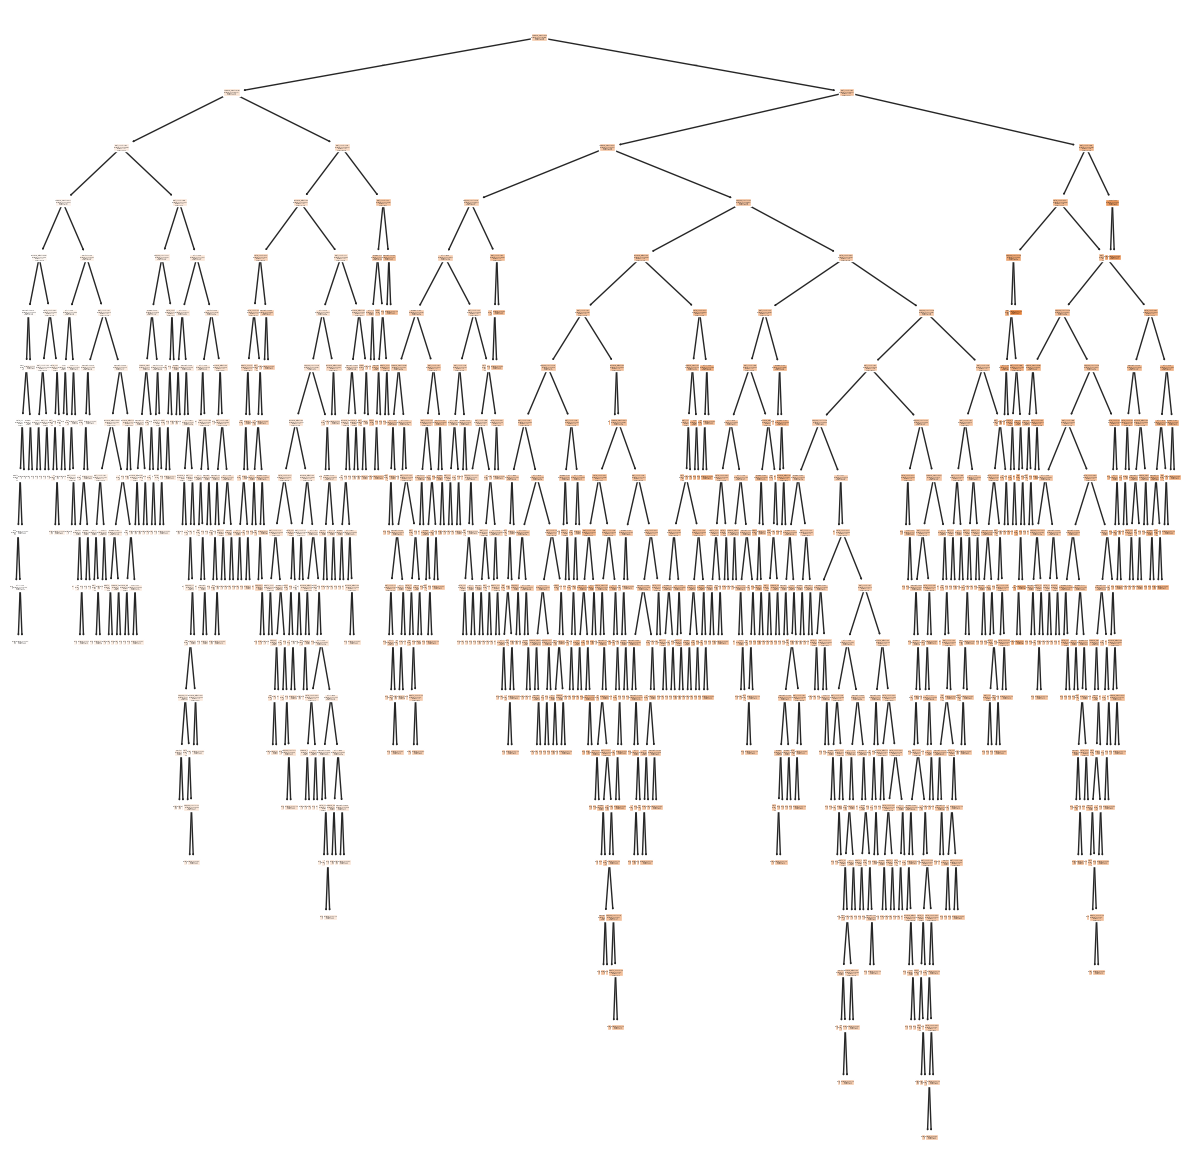

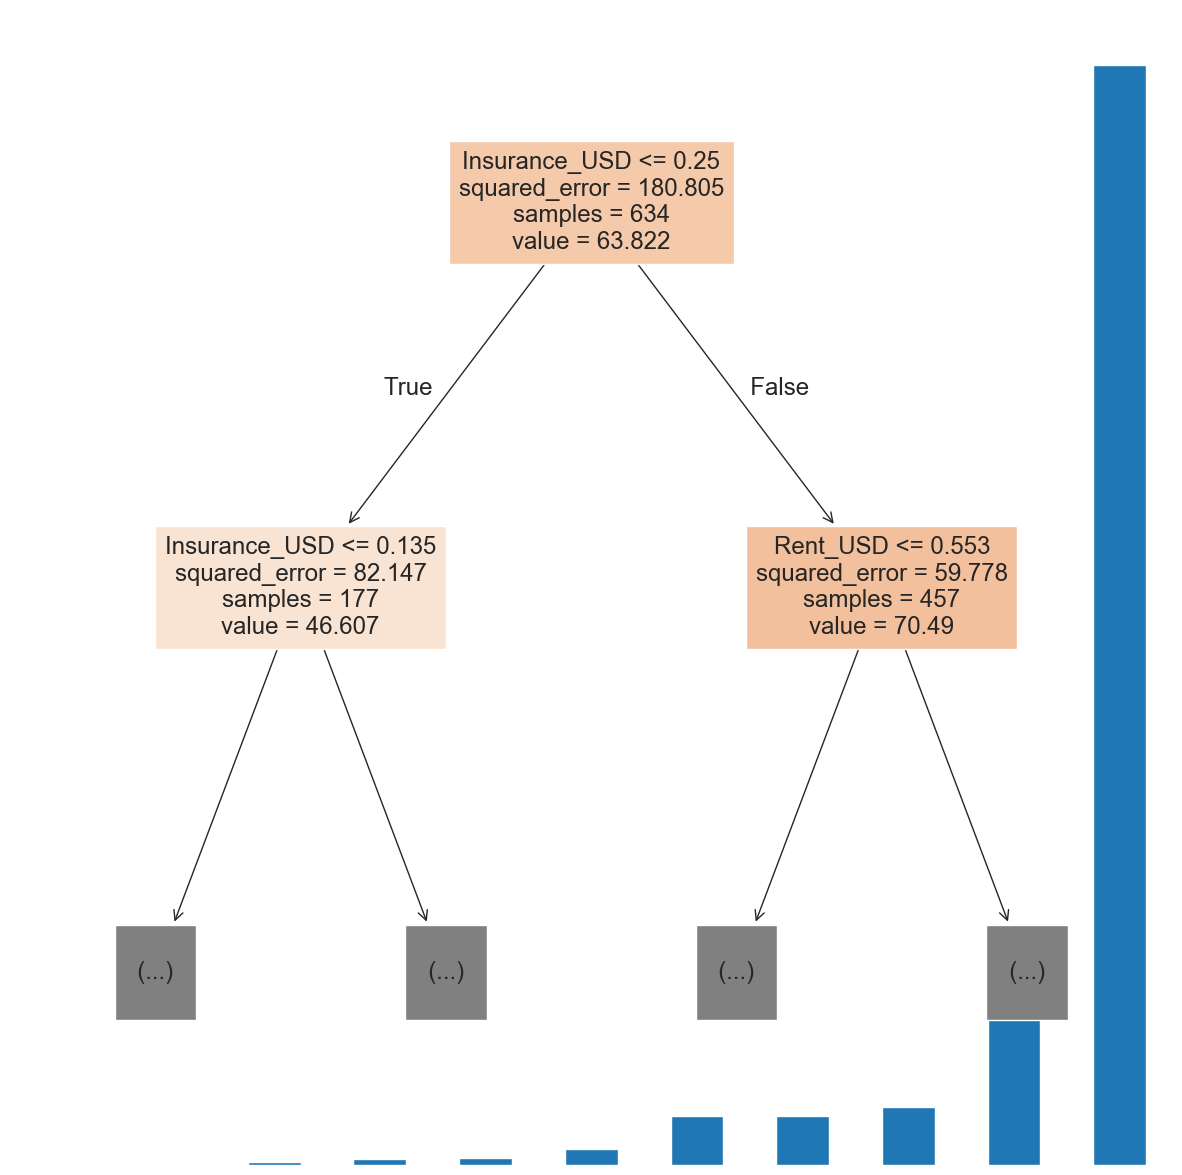

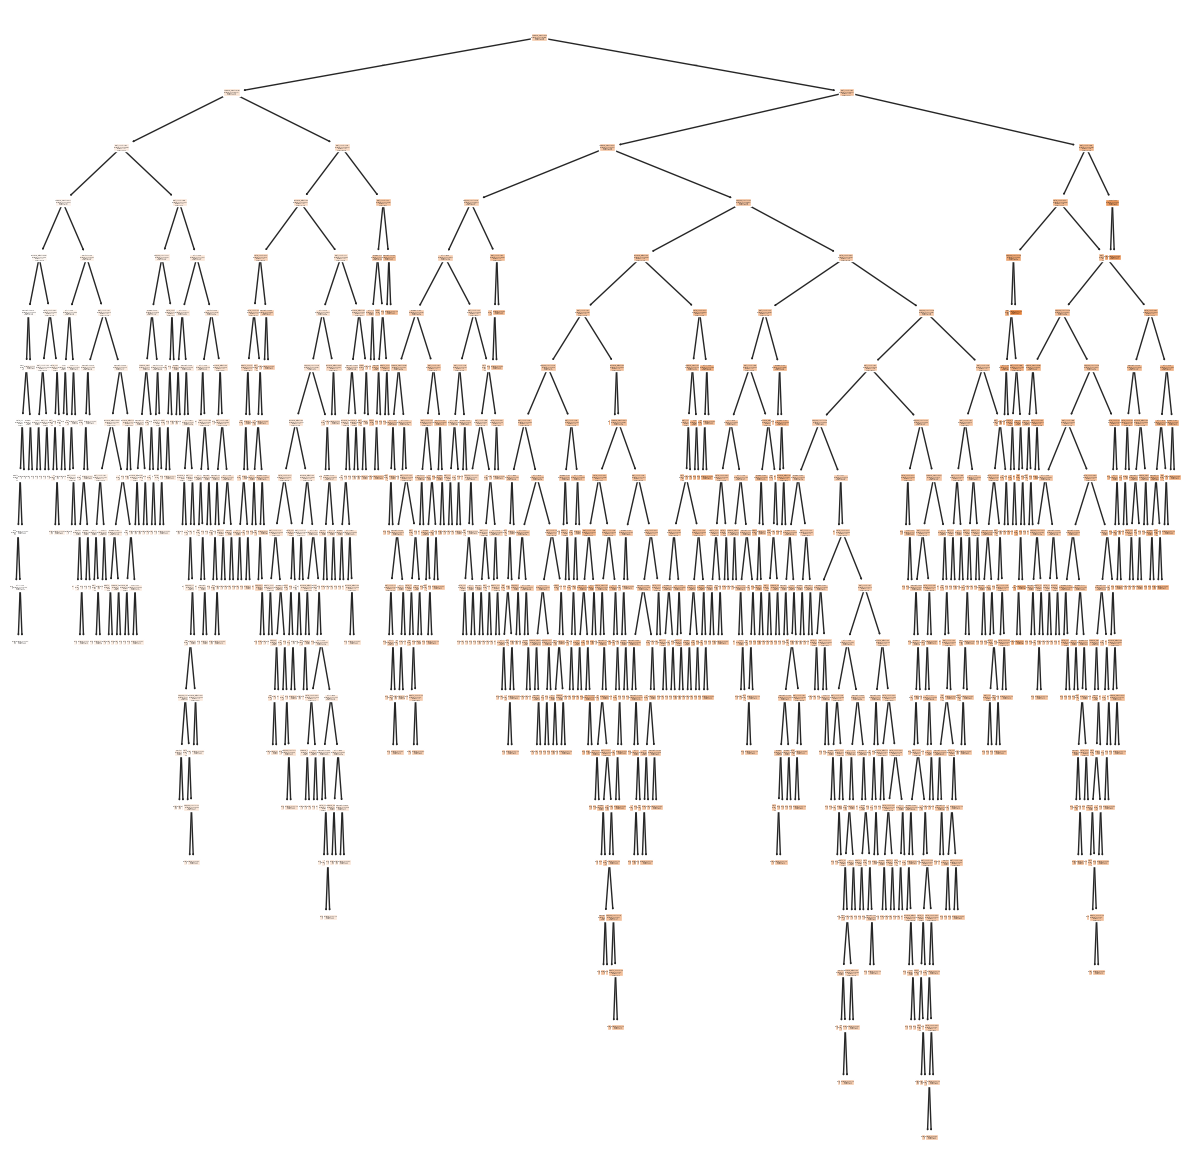

In [56]:
plt.figure(figsize = (15,15))
tree.plot_tree(model_two, 
                   feature_names = list(X_train.columns), 
                   filled = True);
plt.show()

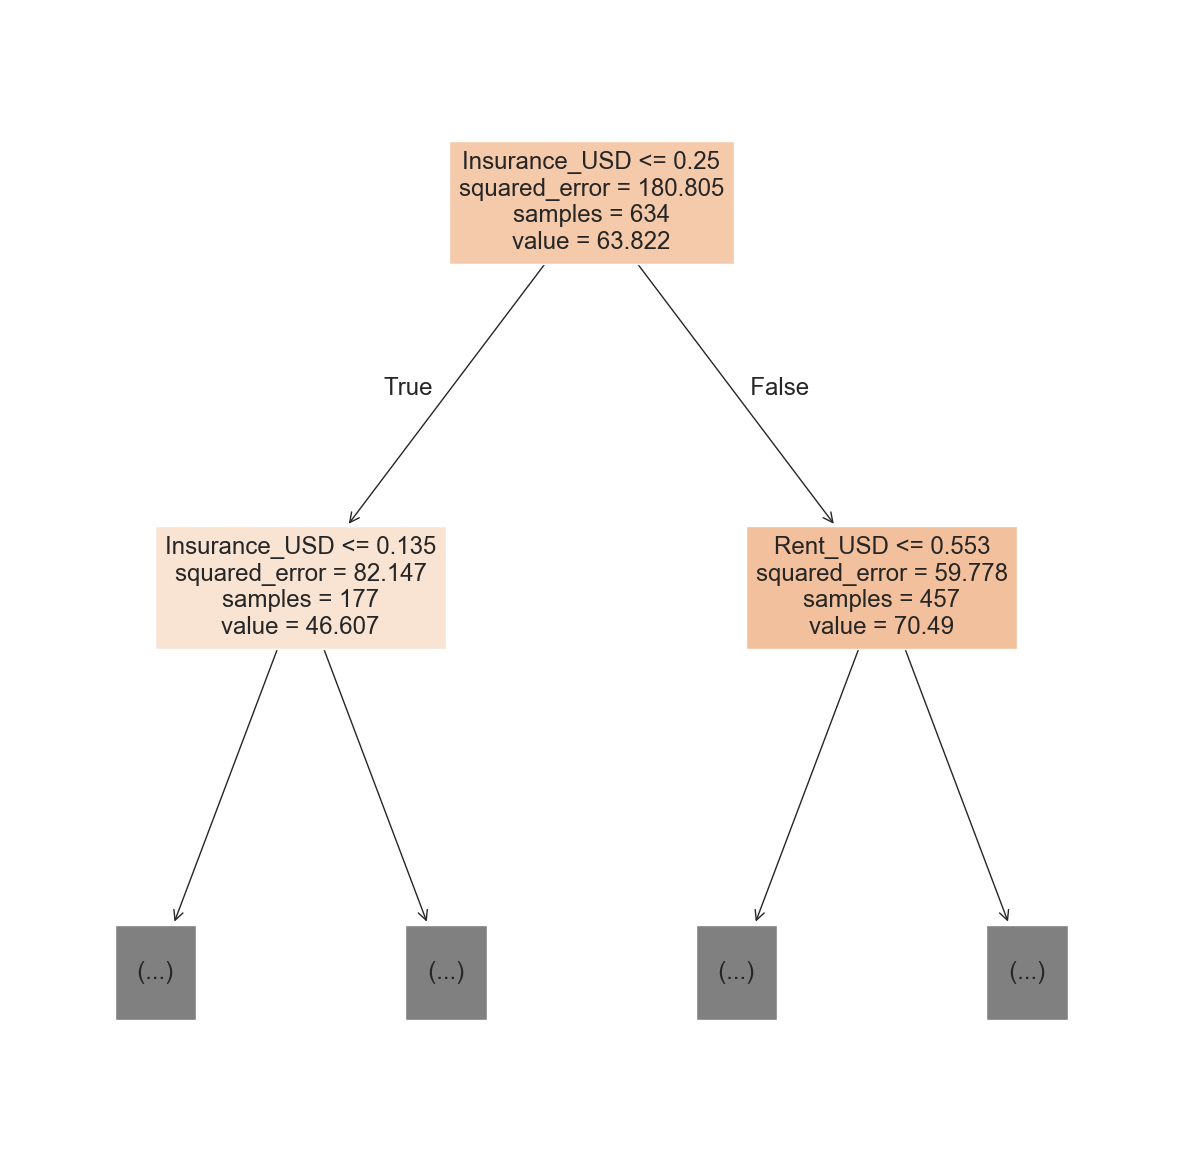

In [57]:
plt.figure(figsize = (15,15))
tree.plot_tree(model_two, 
               feature_names = list(X_train.columns), 
               filled = True,
               max_depth = 1);
plt.show()

In [58]:
importance = model_two.feature_importances_
importance

array([1.68865888e-03, 1.09038887e-02, 4.12381506e-03, 4.44562093e-03,
       5.48747867e-04, 5.80392740e-04, 3.27586967e-02, 1.42362864e-01,
       3.87156153e-02, 7.31402168e-01, 3.24695312e-02])

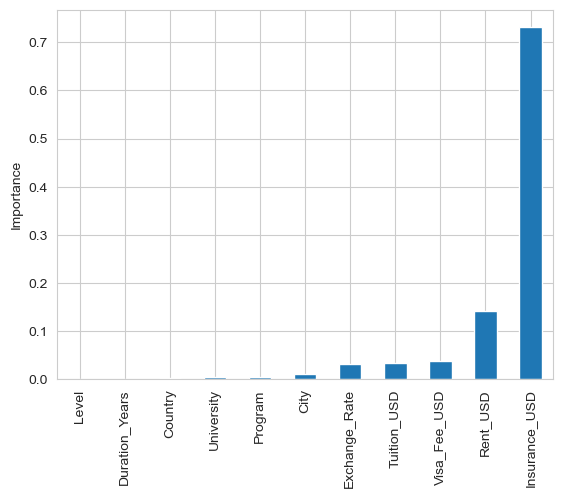

In [59]:
feature_importance = pd.Series(importance, index = X_train.columns)
feature_importance.sort_values().plot(kind = 'bar')
plt.ylabel('Importance');
plt.show()

In [63]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
list(ccp_alphas)

[0.0,
 1.4345342299257543e-15,
 1.4345342299257543e-15,
 1.4345342299257543e-15,
 1.4345342299257543e-15,
 2.8690684598515085e-15,
 2.8690684598515085e-15,
 4.303602689777263e-15,
 5.738136919703017e-15,
 5.738136919703017e-15,
 5.738136919703017e-15,
 7.172671149628771e-15,
 8.607205379554526e-15,
 8.607205379554526e-15,
 1.8648944989034807e-14,
 2.0083479218960562e-14,
 4.0166958437921124e-14,
 7.88643532566429e-06,
 7.88643532566429e-06,
 7.886435331402427e-06,
 7.886435331402429e-06,
 7.88643533355423e-06,
 7.886435333912862e-06,
 7.886435336423298e-06,
 7.886435338575099e-06,
 7.88643534574777e-06,
 1.0515247098973009e-05,
 1.0515247105787047e-05,
 1.051524711331835e-05,
 1.1829652992082772e-05,
 3.154574132417517e-05,
 3.154574132417518e-05,
 3.154574132525108e-05,
 3.1545741325609715e-05,
 3.1545741325609715e-05,
 3.1545741325609715e-05,
 3.154574133134785e-05,
 3.154574133708599e-05,
 3.154574134138959e-05,
 4.2060988433189925e-05,
 4.2060988438928065e-05,
 6.572029442345224e-0

In [64]:
ccp_alphas = ccp_alphas[:-1]
list(ccp_alphas)

[0.0,
 1.4345342299257543e-15,
 1.4345342299257543e-15,
 1.4345342299257543e-15,
 1.4345342299257543e-15,
 2.8690684598515085e-15,
 2.8690684598515085e-15,
 4.303602689777263e-15,
 5.738136919703017e-15,
 5.738136919703017e-15,
 5.738136919703017e-15,
 7.172671149628771e-15,
 8.607205379554526e-15,
 8.607205379554526e-15,
 1.8648944989034807e-14,
 2.0083479218960562e-14,
 4.0166958437921124e-14,
 7.88643532566429e-06,
 7.88643532566429e-06,
 7.886435331402427e-06,
 7.886435331402429e-06,
 7.88643533355423e-06,
 7.886435333912862e-06,
 7.886435336423298e-06,
 7.886435338575099e-06,
 7.88643534574777e-06,
 1.0515247098973009e-05,
 1.0515247105787047e-05,
 1.051524711331835e-05,
 1.1829652992082772e-05,
 3.154574132417517e-05,
 3.154574132417518e-05,
 3.154574132525108e-05,
 3.1545741325609715e-05,
 3.1545741325609715e-05,
 3.1545741325609715e-05,
 3.154574133134785e-05,
 3.154574133708599e-05,
 3.154574134138959e-05,
 4.2060988433189925e-05,
 4.2060988438928065e-05,
 6.572029442345224e-0

In [65]:
train_scores, test_scores = [], []
for alpha in ccp_alphas:
    regressor_ = DecisionTreeRegressor(random_state = 1234, ccp_alpha = alpha)
    model_two_ = regressor_.fit(X_train, y_train)
    train_scores.append(model_two_.score(X_train, y_train))
    test_scores.append(model_two_.score(X_test, y_test))

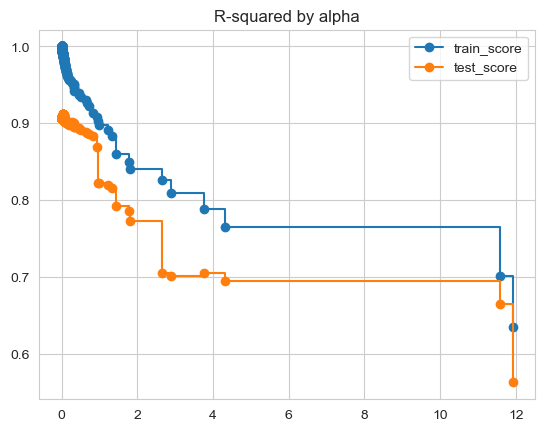

In [66]:
plt.plot(ccp_alphas, 
         train_scores, 
         marker = "o", 
         label = 'train_score', 
         drawstyle = "steps-post")
plt.plot(ccp_alphas, 
         test_scores, 
         marker = "o", 
         label = 'test_score', 
         drawstyle = "steps-post")
plt.legend()
plt.title('R-squared by alpha');
plt.show()

In [67]:
test_scores

[0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.9058119144764929,
 0.905807431980864,
 0.905807431980864,
 0.905807431980864,
 0.9058062916968881,
 0.9058062916968881,
 0.905787535991493,
 0.9057744423858398,
 0.9057744423858398,
 0.9057734593824124,
 0.9057734593824124,
 0.9057755389807745,
 0.9057755389807745,
 0.9057852608846716,
 0.9057852608846716,
 0.9057791269432846,
 0.9057934394731877,
 0.9057295835705428,
 0.9057295835705428,
 0.9057295835705428,
 0.9057295835705428,
 0.9057295835705428,
 0.9057295835705428,
 0.9057280457162918,
 0.9057123875639191,
 0.9057123875639191,
 0.9057123875639191,
 0.9057123875639191,
 0.9057123875639191,
 0.9057073152662336,
 0.905692806135645,
 0.905692806135645

In [68]:
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[ix]
best_alpha

0.03893375394321797

In [70]:
regressor_ = DecisionTreeRegressor(random_state = 1234, ccp_alpha = best_alpha)
model_two_ = regressor_.fit(X_train, y_train)

In [71]:
model_.score(X_train, y_train)

0.9869250601254611

In [72]:
model_.score(X_test, y_test)

0.912640772203073

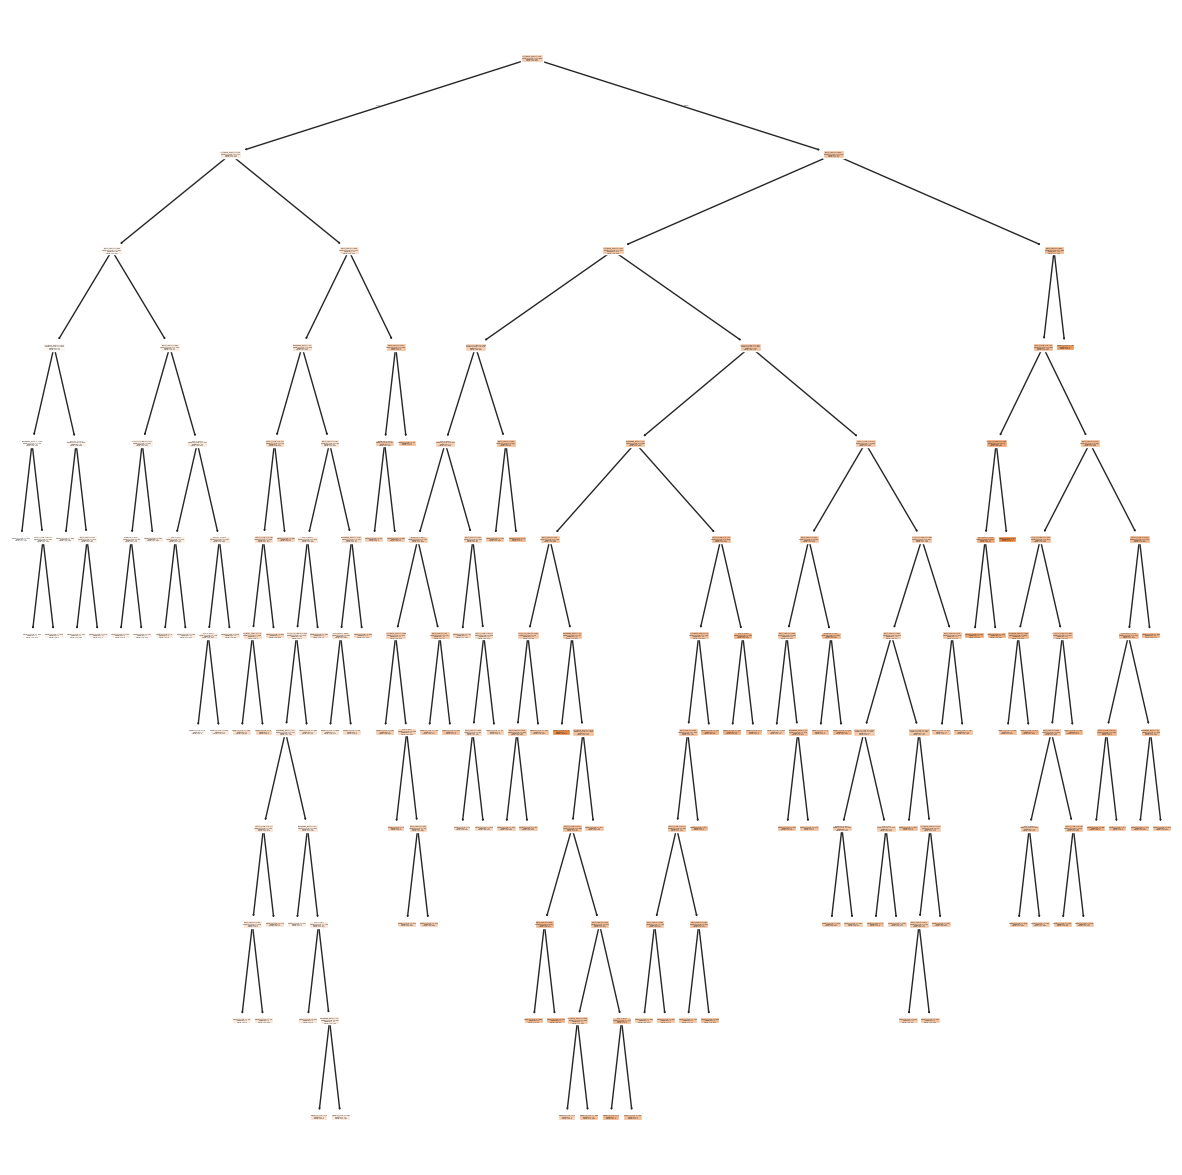

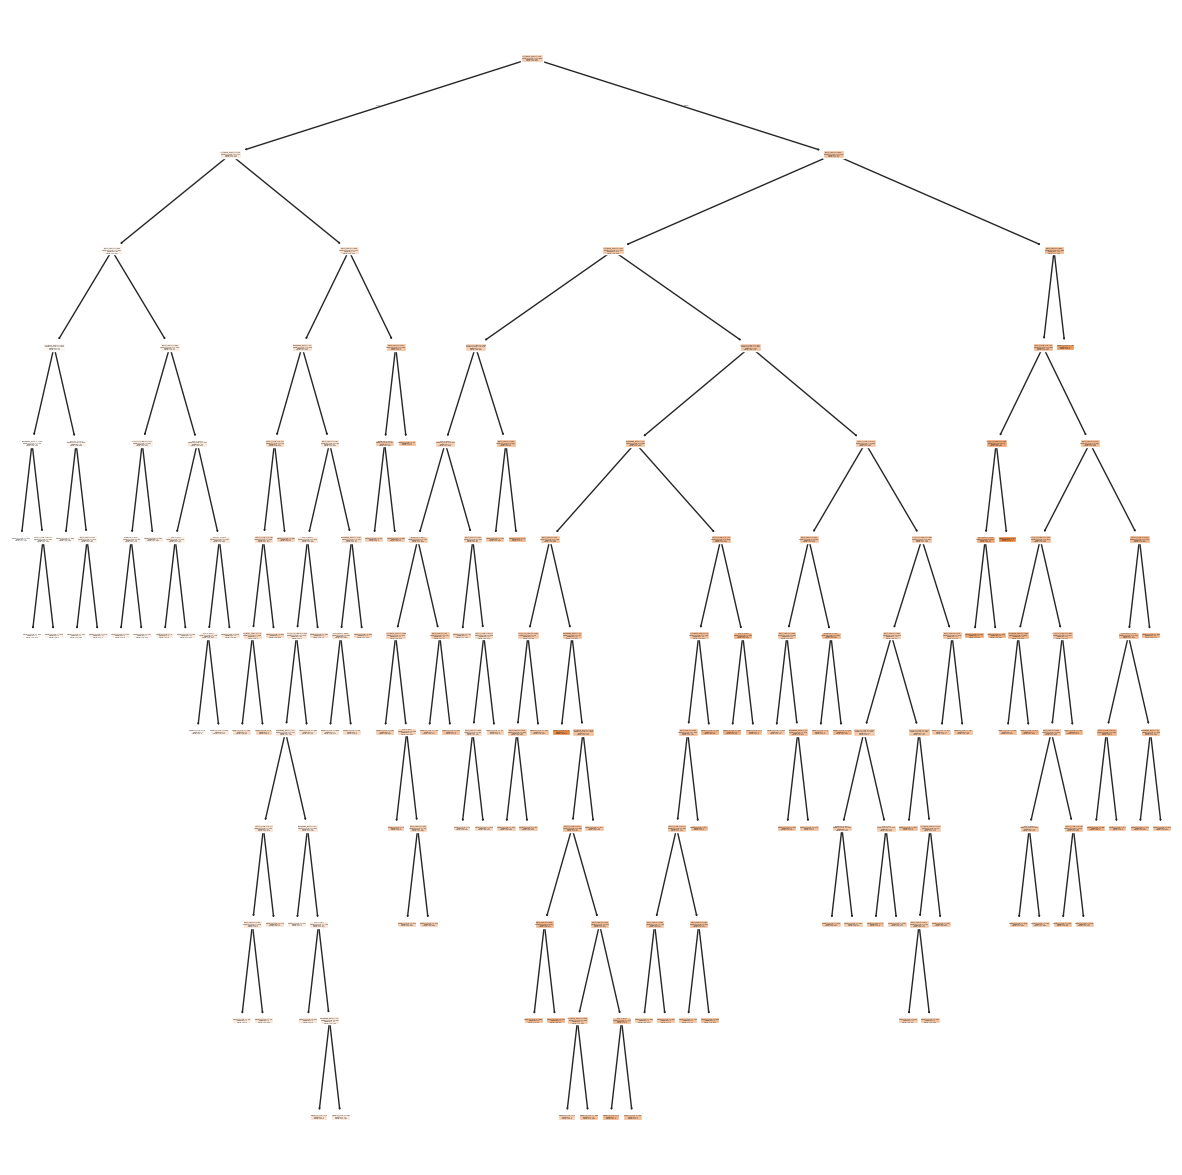

In [74]:
plt.figure(figsize = (15,15))
tree.plot_tree(model_two_, 
                   feature_names = list(X_train.columns),
                   filled = True);
plt.show()

In [76]:
y_pred = model_one.predict(X_test)

In [78]:
y_pred

array([[ 45.01458373],
       [ 72.29349445],
       [ 58.65727985],
       [ 68.31267442],
       [ 46.39544525],
       [ 42.85291605],
       [ 45.67054795],
       [ 81.21805066],
       [ 65.80920111],
       [ 68.16245865],
       [ 91.28907862],
       [ 75.44756213],
       [ 63.46163735],
       [ 52.31807938],
       [ 44.11683014],
       [ 72.70609754],
       [ 63.48192505],
       [ 68.90703697],
       [ 49.62076916],
       [ 90.31890735],
       [ 66.13871999],
       [102.16884101],
       [ 59.97400573],
       [ 84.88411786],
       [ 61.45314148],
       [ 69.23267763],
       [ 70.34053071],
       [ 84.00357384],
       [ 75.19940105],
       [ 67.25873105],
       [ 49.21104753],
       [ 56.79722514],
       [ 70.90305744],
       [ 85.47559679],
       [ 67.97432535],
       [ 51.4776706 ],
       [ 79.00935407],
       [ 49.3245194 ],
       [ 50.59955004],
       [ 65.80378886],
       [ 76.63642269],
       [ 81.65192803],
       [ 51.48615647],
       [ 47

In [80]:
list_new = list(X_test.columns)
list_new

['Country',
 'City',
 'University',
 'Program',
 'Level',
 'Duration_Years',
 'Tuition_USD',
 'Rent_USD',
 'Visa_Fee_USD',
 'Insurance_USD',
 'Exchange_Rate']

In [87]:
new_input_df = pd.DataFrame([{
    'Country':22 ,
    'City': 330,
    'University': 307,
    'Program': 17,
    'Level': 1,
    'Duration_Years': 1,
    'Tuition_USD': 0,
    'Rent_USD': 0.051,
    'Visa_Fee_USD': 0.34,
    'Insurance_USD': 0.69,
    'Exchange_Rate': 0.0000030,
}])

In [88]:
y_input_pred = model_one.predict(new_input_df)
y_input_pred

array([[63.7861262]])

In [89]:
y_input_pred_two = model_two_.predict(new_input_df)
y_input_pred_two

array([68.72])

In [91]:
combined_models = [('lr', LinearRegression()),
                  ('dt', DecisionTreeRegressor(max_depth = 5, random_state = 1234))]

In [92]:
meta_model = LinearRegression()

In [123]:
stacked_model = StackingRegressor(estimators = combined_models, 
                                                final_estimator = meta_model)

In [124]:
stacked_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('dt',
                               DecisionTreeRegressor(max_depth=5,
                                                     random_state=1234))],
                  final_estimator=LinearRegression())

In [125]:
stacked_model.fit(X_test, y_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('dt',
                               DecisionTreeRegressor(max_depth=5,
                                                     random_state=1234))],
                  final_estimator=LinearRegression())

In [126]:
y_pred_2 = stacked_model.score(X_test, y_test)
y_pred_2

0.9463156827023222

In [127]:
y_pred_2 = stacked_model.score(X_train, y_train)
y_pred_2

0.890513549710693

In [128]:
scores = cross_val_score(stacked_model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean:", scores.mean())


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Cross-validated R² scores: [0.53993976 0.62766615 0.48834983 0.75390256 0.89328033]
Mean: 0.6606277253135504


In [129]:
scores = cross_val_score(model_one, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean:", scores.mean())


Cross-validated R² scores: [0.65979148 0.48469979 0.59687805 0.72246885 0.80394234]
Mean: 0.6535561027328823


In [130]:
scores = cross_val_score(model_two_, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean:", scores.mean())

Cross-validated R² scores: [0.1682878  0.29784726 0.44158977 0.66750444 0.71038752]
Mean: 0.4571233567385491
